In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table
%matplotlib inline

In [2]:
data = pd.read_excel("D:\\Jupyter Notebook\\Assignment 2\\V2\\FK_SP_Multiple_Pgs_Combined_Cleansed_V1_V3_1.xlsx")

In [3]:
data.shape

(996, 20)

In [4]:
data1=pd.DataFrame(data)
data1 = data1.drop(['Unnamed: 0','RAM','Camera','Price','Battery1','Brand','Processor'], axis = 1)

In [5]:
data1.head()

,Product_Name,Rating,Display,Battery,Price1,RAM1,ROM,Expandable_Memory,Rear_Camera,Front_Camera,Processor1,Brand_Name,Processor_Category
0,"Motorola G8 Power Lite (Arctic Blue, 64 GB)",4.5,6.5,5000,9499,4 GB RAM,64 GB ROM,Expandable Upto 256 GB,16MP + 2MP + 2MP,8MP,MediaTek Helio P35,Motorola,MediaTek
1,"Motorola G8 Power Lite (Arctic Blue, 64 GB)",4.5,6.5,5000,9499,4 GB RAM,64 GB ROM,Expandable Upto 256 GB,16MP + 2MP + 2MP,8MP,MediaTek Helio P35,Motorola,MediaTek
2,"Realme 6 Pro (Lightning Blue, 64 GB)",4.5,6.6,4300,17999,6 GB RAM,64 GB ROM,Expandable Upto 256 GB,64MP + 12MP + 8MP + 2MP,16MP + 8MP Dual,Snapdragon 720G,Realme,Qualcomm
3,"Realme 6 Pro (Lightning Blue, 64 GB)",4.5,6.6,4300,17999,6 GB RAM,64 GB ROM,Expandable Upto 256 GB,64MP + 12MP + 8MP + 2MP,16MP + 8MP Dual,Snapdragon 720G,Realme,Qualcomm
4,"Motorola G8 Power Lite (Royal Blue, 64 GB)",4.5,6.5,5000,9499,4 GB RAM,64 GB ROM,Expandable Upto 256 GB,16MP + 2MP + 2MP,8MP,MediaTek Helio P35,Motorola,MediaTek


In [6]:
#temp = data1.Expandable_Memory.fillna("NULL")
#data1 = data1.replace(r'^\s*$', np.NaN, regex=True)
data1['Expandable_Memory'].value_counts()

 Expandable Upto 256 GB    338
Blank                      258
 Expandable Upto 512 GB    178
 Expandable Upto 128 GB     86
 Expandable Upto 32 GB      48
 Expandable Upto 1 TB       28
 Expandable Upto 64 GB      22
 Expandable Upto 2 TB       20
 Expandable Upto 400 GB     14
 Expandable Upto 200 GB      4
Name: Expandable_Memory, dtype: int64

In [7]:
data1['Brand_Name'].value_counts()

Samsung      356
Vivo         218
Realme        86
Xiaomi        78
Nokia         74
Motorola      46
Micromax      40
LG            32
Lenovo        20
Alcatel       14
Asus          14
Panasonic     12
Google         6
Name: Brand_Name, dtype: int64

In [8]:
data1['Expandable_Memory'].value_counts()

 Expandable Upto 256 GB    338
Blank                      258
 Expandable Upto 512 GB    178
 Expandable Upto 128 GB     86
 Expandable Upto 32 GB      48
 Expandable Upto 1 TB       28
 Expandable Upto 64 GB      22
 Expandable Upto 2 TB       20
 Expandable Upto 400 GB     14
 Expandable Upto 200 GB      4
Name: Expandable_Memory, dtype: int64

In [9]:
#data1['Price']=data1['Price'].str.replace('₹','')
#data1['Price']=data1['Price'].str.replace(',','')
#data1['Price'] = data1['Price'].astype(int)
data1.dtypes

Product_Name           object
Rating                float64
Display               float64
Battery                object
Price1                  int64
RAM1                   object
ROM                    object
Expandable_Memory      object
Rear_Camera            object
Front_Camera           object
Processor1             object
Brand_Name             object
Processor_Category     object
dtype: object

In [10]:
data1.columns = ['Product_Name','Rating','Display','Battery','Price','RAM','ROM','Expandable_Memory','Rear_Camera','Front_Camera','Processor','Brand_Name','Processor_Category']

In [11]:
data1['Price_Category']=pd.cut(x=data1['Price'],
                               bins=[3000, 6000, 10000, 15000,
                                     20000, 25000, 30000, 40000,
                                     60000,130000], 
                               labels=['a. 3.6K-6K','b. 6K-10K',
                                       'c. 10K-15K', 'd. 15K-20K',
                                       'e. 20K-25K','f. 25K-30K',
                                       'g. 30K-40K','h. 40K-60K',
                                       'i. 60k-1.2L'])
data1['Price_Category'].value_counts(sort=False)

a. 3.6K-6K      24
b. 6K-10K      206
c. 10K-15K     264
d. 15K-20K     234
e. 20K-25K      68
f. 25K-30K      52
g. 30K-40K      46
h. 40K-60K      50
i. 60k-1.2L     52
Name: Price_Category, dtype: int64

In [12]:
(data1['Price_Category'].value_counts(sort=False)/
     data1['Price_Category'].count())*100

a. 3.6K-6K      2.409639
b. 6K-10K      20.682731
c. 10K-15K     26.506024
d. 15K-20K     23.493976
e. 20K-25K      6.827309
f. 25K-30K      5.220884
g. 30K-40K      4.618474
h. 40K-60K      5.020080
i. 60k-1.2L     5.220884
Name: Price_Category, dtype: float64

In [13]:
data1['Battery']=data1['Battery'].str.replace(' Li-polymer','')
data1['Battery']=data1['Battery'].str.replace(' Li','')
data1['Battery'] = data1['Battery'].astype(int)
data1['Battery'].describe()

count     996.000000
mean     3682.710843
std       857.181299
min      1600.000000
25%      3000.000000
50%      3700.000000
75%      4200.000000
max      6000.000000
Name: Battery, dtype: float64

In [14]:
data1['Battery_Category']=pd.cut(x=data1['Battery'],bins=[1200, 2100, 3000, 3500, 4000, 5000, 6000], labels=['a. 1200-2100','b. 2100-3000','c. 3000-3500', 'd. 3500-4000','e. 4000-5000', 'f. 5000-6000'])
data1['Battery_Category'].value_counts(sort=False)

a. 1200-2100     40
b. 2100-3000    248
c. 3000-3500    188
d. 3500-4000    210
e. 4000-5000    302
f. 5000-6000      8
Name: Battery_Category, dtype: int64

In [15]:
data1['Rating_Category']=pd.cut(x=data1['Rating'],bins=[1,3,4,4.25,4.35,4.45,5], labels=['a. 1-3','b. 3-4', 'c. 4-4.25', 'd. 4.25-4.35', 'e. 4.35-4.45','f. 4.45-5'])

In [16]:
data1['Rating_Category'].value_counts(sort=False)

a. 1-3           12
b. 3-4          178
c. 4-4.25       164
d. 4.25-4.35    166
e. 4.35-4.45    280
f. 4.45-5       196
Name: Rating_Category, dtype: int64

In [17]:
(data1['Rating_Category'].value_counts(sort=False)/
     data1['Rating_Category'].count())*100

a. 1-3           1.204819
b. 3-4          17.871486
c. 4-4.25       16.465863
d. 4.25-4.35    16.666667
e. 4.35-4.45    28.112450
f. 4.45-5       19.678715
Name: Rating_Category, dtype: float64

Text(0, 0.5, 'Number of Phones')

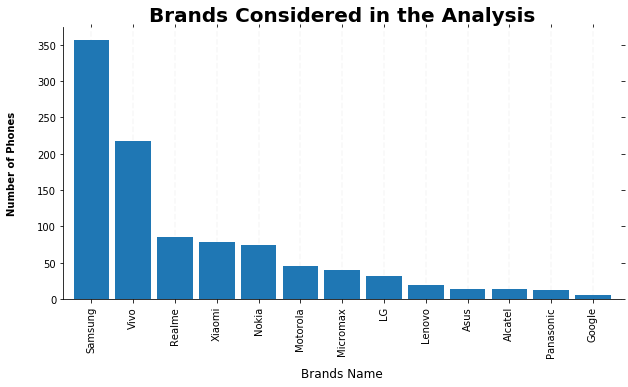

In [18]:
x = data1.groupby('Brand_Name')['Product_Name'].count().sort_values(ascending=False)
ax = x.plot(kind='bar', figsize=(10, 5), zorder=2, width=0.85)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_title('Brands Considered in the Analysis', weight='bold', size=20)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
# Set x-axis label
ax.set_xlabel("Brands Name", labelpad=10, size=12)
# Set y-axis label
ax.set_ylabel("Number of Phones", labelpad=20, weight='bold', size=10)

#for p in ax.patches:
    #width, height = p.get_width(), p.get_height()
    #x,y = p.get_xy() 
    #ax.annotate('{:.0%}'.format(height), (x,y + height + 0.1 ))

Text(0, 0.5, 'Number of Phones')

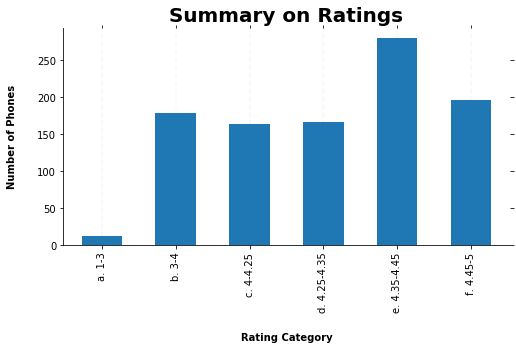

In [19]:
x = data1.groupby('Rating_Category')['Product_Name'].count()
ax = x.plot(kind='bar', figsize=(8, 4), zorder=2, width=0.55)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_title('Summary on Ratings', weight='bold', size=20)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
# Set x-axis label
ax.set_xlabel("Rating Category", labelpad=20, weight='bold', size=10)
# Set y-axis label
ax.set_ylabel("Number of Phones", labelpad=20, weight='bold', size=10)

Text(0, 0.5, 'Number of Phones')

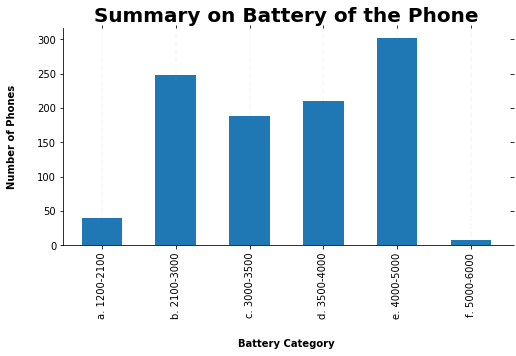

In [20]:
x = data1.groupby('Battery_Category')['Product_Name'].count()
ax = x.plot(kind='bar', figsize=(8, 4), zorder=2, width=0.55)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_title('Summary on Battery of the Phone', weight='bold', size=20)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
# Set x-axis label
ax.set_xlabel("Battery Category", labelpad=20, weight='bold', size=10)
# Set y-axis label
ax.set_ylabel("Number of Phones", labelpad=20, weight='bold', size=10)

In [21]:
data1['Battery_Category'].value_counts(sort=False)

a. 1200-2100     40
b. 2100-3000    248
c. 3000-3500    188
d. 3500-4000    210
e. 4000-5000    302
f. 5000-6000      8
Name: Battery_Category, dtype: int64

In [22]:
(data1['Battery_Category'].value_counts(sort=False)/
     data1['Battery_Category'].count())*100

a. 1200-2100     4.016064
b. 2100-3000    24.899598
c. 3000-3500    18.875502
d. 3500-4000    21.084337
e. 4000-5000    30.321285
f. 5000-6000     0.803213
Name: Battery_Category, dtype: float64

In [23]:
data1['Processor_Category'].value_counts(sort=False)

Exynos      184
Intel        10
MediaTek    182
Qualcomm    350
Blank       270
Name: Processor_Category, dtype: int64

In [24]:
(data1['Processor_Category'].value_counts(sort=False)/
     data1['Processor_Category'].count())*100

Exynos      18.473896
Intel        1.004016
MediaTek    18.273092
Qualcomm    35.140562
Blank       27.108434
Name: Processor_Category, dtype: float64

Text(0, 0.5, 'Number of Phones')

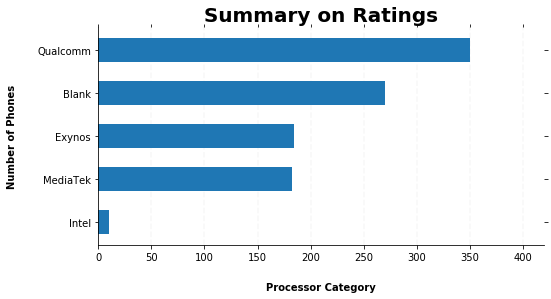

In [25]:
x = data1.groupby('Processor_Category')['Product_Name'].count().sort_values()
ax = x.plot(kind='barh', figsize=(8, 4), zorder=2, width=0.55)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_title('Summary on Ratings', weight='bold', size=20)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
# Set x-axis label
ax.set_xlabel("Processor Category", labelpad=20, weight='bold', size=10)
# Set y-axis label
ax.set_ylabel("Number of Phones", labelpad=20, weight='bold', size=10)

In [26]:
data1['Processor_Category'].value_counts(sort=False)

Exynos      184
Intel        10
MediaTek    182
Qualcomm    350
Blank       270
Name: Processor_Category, dtype: int64

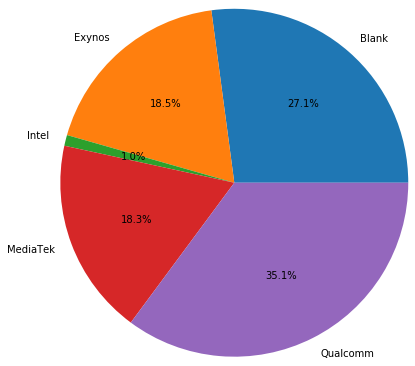

In [27]:
labels = data1['Processor_Category'].astype('category').cat.categories.tolist()
counts = data1['Processor_Category'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', radius=2) #autopct is show the % on plot
#ax1.axis('equal')
plt.show()

In [28]:
data1['RAM'].value_counts(sort=False)

8 GB RAM       112
4 GB RAM       278
6 GB RAM       146
1 GB RAM        74
1.5 GB RAM       2
2 GB RAM       154
12 GB RAM       26
3 GB RAM       204
Name: RAM, dtype: int64

In [29]:
#data1 = data1.fillna(data1['Expandable_Memory'].value_counts().index[0])

In [30]:
data1['Expandable_Memory']=data1['Expandable_Memory'].str.replace('Expandable Upto 128','Expandable Upto 128 GB')
data1['Expandable_Memory']=data1['Expandable_Memory'].str.replace('Expandable Upto 128 GB GB','Expandable Upto 128 GB')
data1['Expandable_Memory'].value_counts(sort=True)

 Expandable Upto 256 GB    338
Blank                      258
 Expandable Upto 512 GB    178
 Expandable Upto 128 GB     86
 Expandable Upto 32 GB      48
 Expandable Upto 1 TB       28
 Expandable Upto 64 GB      22
 Expandable Upto 2 TB       20
 Expandable Upto 400 GB     14
 Expandable Upto 200 GB      4
Name: Expandable_Memory, dtype: int64

In [31]:
data1['Expandable_Memory']=data1['Expandable_Memory'].str.replace('Expandable Upto ','')
data1['Expandable_Memory'].value_counts(sort=False)

 32 GB      48
 64 GB      22
 200 GB      4
 1 TB       28
 400 GB     14
 256 GB    338
 512 GB    178
 128 GB     86
 2 TB       20
Blank      258
Name: Expandable_Memory, dtype: int64

In [32]:
data1['Brand_Name'].value_counts()

Samsung      356
Vivo         218
Realme        86
Xiaomi        78
Nokia         74
Motorola      46
Micromax      40
LG            32
Lenovo        20
Alcatel       14
Asus          14
Panasonic     12
Google         6
Name: Brand_Name, dtype: int64

In [33]:
data1.dtypes

Product_Name            object
Rating                 float64
Display                float64
Battery                  int32
Price                    int64
RAM                     object
ROM                     object
Expandable_Memory       object
Rear_Camera             object
Front_Camera            object
Processor               object
Brand_Name              object
Processor_Category      object
Price_Category        category
Battery_Category      category
Rating_Category       category
dtype: object

In [34]:
data1.nunique()

Product_Name          382
Rating                 22
Display                43
Battery                57
Price                 219
RAM                     8
ROM                    15
Expandable_Memory      10
Rear_Camera            72
Front_Camera           22
Processor             163
Brand_Name             13
Processor_Category      5
Price_Category          9
Battery_Category        6
Rating_Category         6
dtype: int64

In [35]:
data1.isnull().sum(axis = 0)

Product_Name           0
Rating                 0
Display                0
Battery                0
Price                  0
RAM                    0
ROM                    0
Expandable_Memory      0
Rear_Camera            0
Front_Camera          92
Processor              0
Brand_Name             0
Processor_Category     0
Price_Category         0
Battery_Category       0
Rating_Category        0
dtype: int64

In [36]:
data1['Brand_Name'].value_counts()

Samsung      356
Vivo         218
Realme        86
Xiaomi        78
Nokia         74
Motorola      46
Micromax      40
LG            32
Lenovo        20
Alcatel       14
Asus          14
Panasonic     12
Google         6
Name: Brand_Name, dtype: int64

In [37]:
data1.dtypes

Product_Name            object
Rating                 float64
Display                float64
Battery                  int32
Price                    int64
RAM                     object
ROM                     object
Expandable_Memory       object
Rear_Camera             object
Front_Camera            object
Processor               object
Brand_Name              object
Processor_Category      object
Price_Category        category
Battery_Category      category
Rating_Category       category
dtype: object

In [38]:
data1.to_excel("D:\\Jupyter Notebook\\Assignment 2\\V2\\Final_Dataset.xlsx")

In [39]:
data2 = pd.read_excel("D:\\Jupyter Notebook\\Assignment 2\\V2\\Final_Dataset.xlsx")

In [40]:
data2 = data2.drop(['Unnamed: 0'], axis = 1)

In [41]:
corelation = data2.corr()

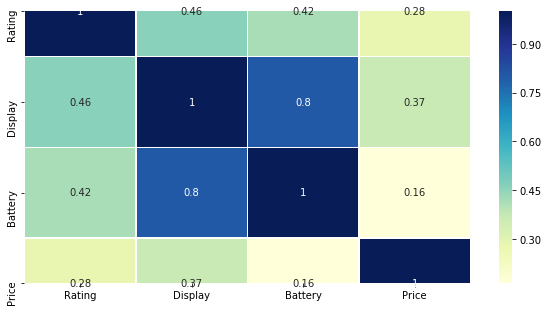

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(corelation,xticklabels=corelation.columns,
            yticklabels=corelation.columns,cmap="YlGnBu", annot=True, linewidth=0.5)

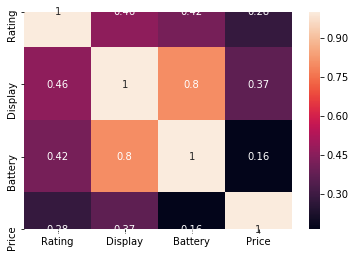

In [43]:
#plt.figure(figsize=(10,5)
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns, annot=True)
#plt.show()

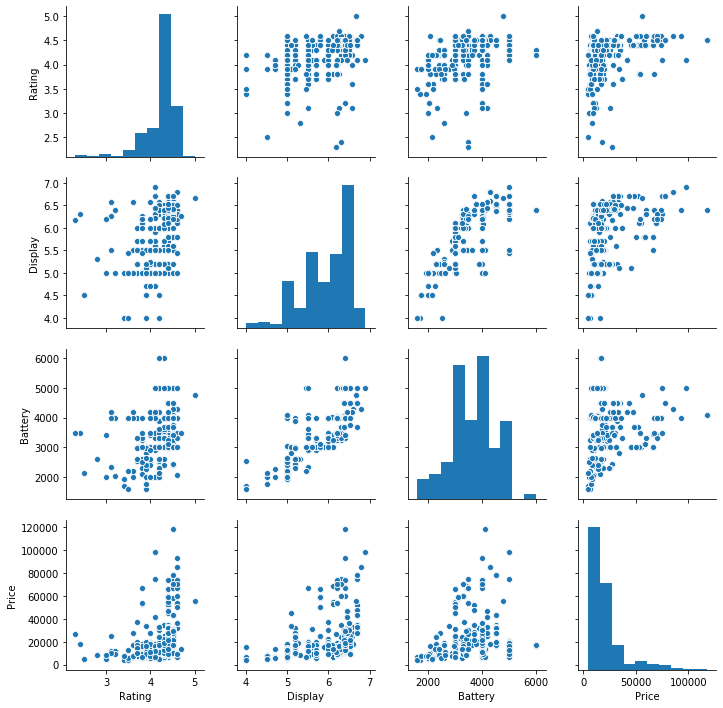

In [44]:
sns.pairplot(data2)

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

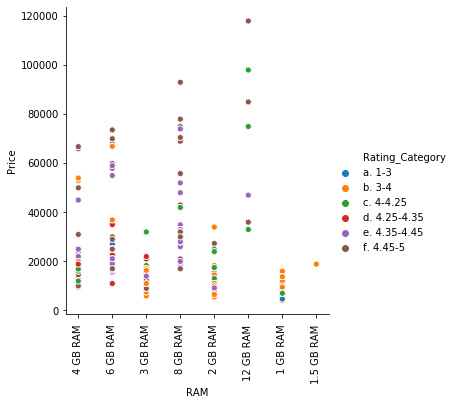

In [45]:
sns.relplot(x='RAM', y='Price', hue='Rating_Category', data=data1)
plt.xticks(rotation='vertical')
#sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

In [46]:
#sns.distplot(data['Price'],bins=5)
data1.head()

,Product_Name,Rating,Display,Battery,Price,RAM,ROM,Expandable_Memory,Rear_Camera,Front_Camera,Processor,Brand_Name,Processor_Category,Price_Category,Battery_Category,Rating_Category
0,"Motorola G8 Power Lite (Arctic Blue, 64 GB)",4.5,6.5,5000,9499,4 GB RAM,64 GB ROM,256 GB,16MP + 2MP + 2MP,8MP,MediaTek Helio P35,Motorola,MediaTek,b. 6K-10K,e. 4000-5000,f. 4.45-5
1,"Motorola G8 Power Lite (Arctic Blue, 64 GB)",4.5,6.5,5000,9499,4 GB RAM,64 GB ROM,256 GB,16MP + 2MP + 2MP,8MP,MediaTek Helio P35,Motorola,MediaTek,b. 6K-10K,e. 4000-5000,f. 4.45-5
2,"Realme 6 Pro (Lightning Blue, 64 GB)",4.5,6.6,4300,17999,6 GB RAM,64 GB ROM,256 GB,64MP + 12MP + 8MP + 2MP,16MP + 8MP Dual,Snapdragon 720G,Realme,Qualcomm,d. 15K-20K,e. 4000-5000,f. 4.45-5
3,"Realme 6 Pro (Lightning Blue, 64 GB)",4.5,6.6,4300,17999,6 GB RAM,64 GB ROM,256 GB,64MP + 12MP + 8MP + 2MP,16MP + 8MP Dual,Snapdragon 720G,Realme,Qualcomm,d. 15K-20K,e. 4000-5000,f. 4.45-5
4,"Motorola G8 Power Lite (Royal Blue, 64 GB)",4.5,6.5,5000,9499,4 GB RAM,64 GB ROM,256 GB,16MP + 2MP + 2MP,8MP,MediaTek Helio P35,Motorola,MediaTek,b. 6K-10K,e. 4000-5000,f. 4.45-5


In [48]:
data1['Price_Category'].value_counts(sort=False)

a. 3.6K-6K      24
b. 6K-10K      206
c. 10K-15K     264
d. 15K-20K     234
e. 20K-25K      68
f. 25K-30K      52
g. 30K-40K      46
h. 40K-60K      50
i. 60k-1.2L     52
Name: Price_Category, dtype: int64

In [49]:
(data1['Price_Category'].value_counts(sort=False)/
     data1['Price_Category'].count())*100

a. 3.6K-6K      2.409639
b. 6K-10K      20.682731
c. 10K-15K     26.506024
d. 15K-20K     23.493976
e. 20K-25K      6.827309
f. 25K-30K      5.220884
g. 30K-40K      4.618474
h. 40K-60K      5.020080
i. 60k-1.2L     5.220884
Name: Price_Category, dtype: float64

In [50]:
df1=data1.groupby(['Price_Category','Brand_Name','Rating_Category','Price_Category','Expandable_Memory','Battery_Category','RAM','ROM'])['Product_Name'].count()
print(df1)
df1.to_excel("D:\\Jupyter Notebook\\Assignment 2\\V2\\Multivariate_Summary.xlsx")

Price_Category  Brand_Name  Rating_Category  Price_Category  Expandable_Memory  Battery_Category  RAM         ROM         
a. 3.6K-6K      Alcatel     a. 1-3           a. 3.6K-6K      Blank              a. 1200-2100      1 GB RAM     8 GB ROM        2
                Micromax    b. 3-4           a. 3.6K-6K       32 GB             a. 1200-2100      1 GB RAM     8 GB ROM        4
                                                              64 GB             b. 2100-3000      2 GB RAM     16 GB ROM       4
                                                             Blank              a. 1200-2100      1 GB RAM     8 GB ROM        4
                Nokia       a. 1-3           a. 3.6K-6K      Blank              b. 2100-3000      1 GB RAM     8 GB ROM        2
                                                                                                                              ..
i. 60k-1.2L     Samsung     f. 4.45-5        i. 60k-1.2L      512 GB            c. 3000-3500      8 GB 

In [51]:
df1=data1.groupby(['Price_Category','Brand_Name'])['Product_Name'].count()
print(df1)
df1.to_excel("D:\\Jupyter Notebook\\Assignment 2\\V2\\Price_Brand_Summary.xlsx")

Price_Category  Brand_Name
a. 3.6K-6K      Alcatel        2
                Micromax      12
                Nokia          4
                Panasonic      2
                Samsung        4
                              ..
h. 40K-60K      Samsung       36
                Xiaomi         2
i. 60k-1.2L     Google         2
                Motorola       4
                Samsung       46
Name: Product_Name, Length: 62, dtype: int64


In [52]:
data1.describe()

,Rating,Display,Battery,Price
count,996.000000,996.000000,996.000000,996.000000
mean,4.242369,5.946145,3682.710843,20652.604418
std,0.319724,0.588441,857.181299,17334.685066
min,2.300000,4.000000,1600.000000,4086.000000
25%,4.200000,5.500000,3000.000000,10900.000000
50%,4.300000,6.200000,3700.000000,15184.000000
75%,4.400000,6.400000,4200.000000,21990.000000
max,5.000000,6.900000,6000.000000,117990.000000


In [53]:
df=data1.groupby(['Price_Category','Brand_Name','Rating_Category','RAM','ROM','Processor_Category'])['Product_Name'].count()
print(df)
df.to_excel("D:\\Jupyter Notebook\\Assignment 2\\V2\\Multiple_Fields.xlsx")

Price_Category  Brand_Name  Rating_Category  RAM        ROM           Processor_Category
a. 3.6K-6K      Alcatel     a. 1-3           1 GB RAM    8 GB ROM     Blank                  2
                Micromax    b. 3-4           1 GB RAM    8 GB ROM     Blank                  4
                                                         8 GB ROM     Blank                  4
                                             2 GB RAM    16 GB ROM    Blank                  2
                                                                      MediaTek               2
                                                                                            ..
i. 60k-1.2L     Samsung     f. 4.45-5        6 GB RAM    128 GB ROM   Blank                 10
                                                         64 GB ROM    Blank                  2
                                             8 GB RAM    128 GB ROM   Exynos                10
                                                        

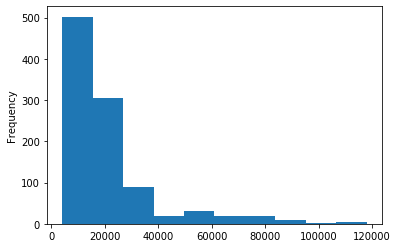

In [54]:
data1['Price'].plot(kind='hist')

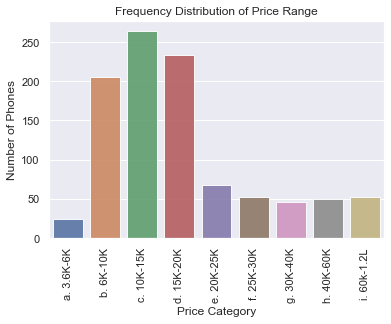

In [56]:
#temp = data1.Expandable_Memory.fillna("NULL")
carrier_count = data1['Price_Category'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=.9)
plt.title('Frequency Distribution of Price Range')
plt.ylabel('Number of Phones', fontsize=12)
plt.xlabel('Price Category', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:

#temp = data2.Expandable_Memory.fillna("Blank")
#data2.dtypes
#Rating_grp = data2.groupby('Expandable_Memory')
#Rating_grp.size()

In [30]:
#data2['Expandable_Memory'].unique()

In [31]:
#carrier_count = data2['Expandable_Memory'].value_counts()
#sns.set(style="darkgrid")
#sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
#plt.title('Frequency Distribution of Carriers')
#plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('Carrier', fontsize=12)
#plt.xticks(rotation='vertical')
#plt.show()

In [32]:
#plt.barh("Brand_Name", "Price", data = data2)
#plt.xlabel("Price") 
#plt.ylabel("Brand_Name") 
#plt.title("Brand Vs Rating")
#plt.show()

In [33]:
#plt.bar("Brand_Name", "Price", data = data2, color = "blue")
#plt.xlabel("Brand_Name")
#plt.xticks(rotation = 90)
#plt.ylabel("Price")
#plt.show()

In [34]:
#data2.dtypes

In [35]:
#Rating_grp = data2.groupby('rating_1')
#Rating_grp.size()

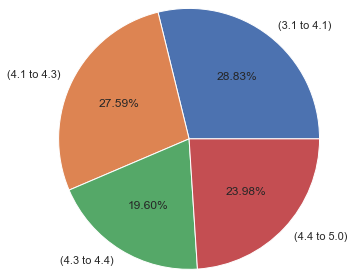

In [390]:
Rating_cat=["(3.1 to 4.1)","(4.1 to 4.3)","(4.3 to 4.4)","(4.4 to 5.0)"]
Total_observations=[303,290,206,252]
plt.pie(Total_observations, labels=Rating_cat, autopct='%1.2f%%',radius=1.5)
plt.show()

In [37]:
#print(data2['Brand_Name'].value_counts())

In [38]:
#carrier_count = data2['Brand_Name'].value_counts()
#sns.set(style="darkgrid")
#sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
#plt.title('Frequency Distribution of Carriers')
#plt.ylabel('Number of Phones', fontsize=12)
#plt.xlabel('Brand Name', fontsize=12)
#plt.xticks(rotation='vertical')
#plt.show()

In [39]:
#carrier_count = data2['ROM'].value_counts()
#sns.set(style="darkgrid")
#sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
#plt.title('Frequency Distribution of Carriers')
#plt.ylabel('Number of Phones', fontsize=12)
#plt.xlabel('Brand Name', fontsize=12)
#plt.xticks(rotation='vertical')
#plt.show()